In [ ]:
# import urllib3
import pickle
import itertools
import numpy as np
# !conda install -y matplotlib
from matplotlib import pyplot as plt
# import certifi
%matplotlib inline

In [ ]:

from ipywidgets import interact, fixed
#note, interact wants you to reference all the inputs even if they are prefilled



In [ ]:
from jgarber_respitch.interactive_plots import interact_drug_data



In [ ]:
import Python_kitchen_tools

drug_use, drugs = Python_kitchen_tools.load_drug_data()

In [ ]:
interact(drug_plot, drug = drugs,drug_use = fixed(drug_use))

In [ ]:
# import word list
# http = urllib3.PoolManager(cert_reqs='CERT_REQUIRED',ca_certs=certifi.where())
# target_url = "https://raw.githubusercontent.com/dwyl/english-words/master/words_alpha.txt"
# r = http.request('GET',target_url)
# wordlist = str(r.data.decode('utf-8')).split('\r\n')

with open('data/dictionary','rb') as file:
    wordlist = set(pickle.load(file))

In [ ]:
import string
alphabet = string.ascii_letters
alphaset = set(alphabet)
from IPython.display import Markdown, display, HTML
def printmd(string):
    display(Markdown(string))
printmd('**bold**')

def printhtml(string):
    display(HTML(string))

moss_vid = '<center><iframe width="560" height="315" src="https://www.youtube.com/embed/g9ixvD0_CmM?rel=0&amp;start=15" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe><?center>'
def play_moss():
    printhtml(moss_vid)

In [ ]:
### Here we make a function that tells us whether or not its an english word

english_words = set(word.strip().lower() for word in wordlist)
def is_english_word(word):
    
    if word.lower() in english_words:
        print('"'+word + '" is a word')
        return 
        
   
    else:
        return

is_english_word('abed')

In [ ]:
from ipywidgets import widgets, HBox, VBox, Layout
class countbutton(widgets.Button):
    def __init__(self,*args,**kwargs):
        super(countbutton, self).__init__(*args, **kwargs)
        self.countnum = 0 #adding an attribute to keep count of shit
    def getcount():
        return self.countnum

In [ ]:
from numpy import random




def countdown(teamname, num = 9): #note max number of teams 5 atm
    i = 0
    out = ''
    vow = ['a','e','i','o','u','y']
    con = ['B','C','D','F','G','H','J','K','L','M','N','P','Q','R','S','t','v','x','z','w']
    from random import shuffle
    shuffle(teamname)
    teamnamelist = teamname*num
    teamnamelist = teamnamelist[0:num+1]
    teamnamelist.append('Ready to play Letters/Countdown?')
    # make the layout of the game
    
    vow_lay = Layout(width = '33%', height = "100px")
    vowels = countbutton(description = 'vowels', layout = vow_lay)
    def restylebutton(b, col = 'blue'):
        b.button_style = 'success'
        b.style.button_color = col
    restylebutton(vowels)
    consonants = countbutton(description = 'consonants', layout = vow_lay)
    restylebutton(consonants)
    emptybox = widgets.Button(description = '', layout = vow_lay)
    emptybox.style.button_color = 'lightblue'
    emptybox.button_color = 'lightblue'
    
    def make_letterbox():
        letterbox = widgets.Button(description = '', layout = Layout(height = '100px'))
        letterbox.button_color = 'lightblue'
        return letterbox
    letterboxes = []
    for t in range(0,num):
        box = make_letterbox()
        letterboxes.append(box)

    titlebox = widgets.HTML()
    titlebox.value = '<h1>'+teamnamelist[0]+' Choose a Consonant or a Vowel</h1>'
    #restylebutton(titlebox, col = 'lightblue')
    titlebox.layout.width ='100%'
    titlebox.layout.height = '100px'
    top_box = HBox([titlebox])
    middle_box = HBox([vowels,emptybox,consonants])
    
    low_box = HBox(letterboxes)


    
    #return outbox, letterboxes, titlebox
    
    
    def vowelclick(b,cb = consonants, titlebox=titlebox, middlebox=emptybox):
        i = b.countnum
        inde = random.randint(0,(len(vow)-1))
        out = vow[inde]
        restylebutton(letterboxes[i])
        letterboxes[i].description = out.upper()
        i = i+1
        b.countnum = i
        cb.countnum = i
        if i <= num-1:
            titlebox.value = '<h1>'+teamnamelist[i] +' Choose a Consonant or a Vowel</h1>'
        else:
            titlebox.value = "<h1>We are ready to play the game!</h1>"
#             middlebox.on_click(playclick)
        return

    def conclick(b,vb = vowels,titlebox=titlebox, middlebox=emptybox):
        i = b.countnum
        inde = random.randint(0,(len(con)-1))
        out = con[inde]
        restylebutton(letterboxes[i])
        letterboxes[i].description = out.upper()
        i = i+1
        b.countnum = i
        vb.countnum = i
        
        if i <= num-1:
            titlebox.value = '<h1>'+teamnamelist[i] +' Choose a Consonant or a Vowel</h1>'
        else:
            titlebox.value = "<h1>We are ready to play the game!</h1>"
#             middlebox.on_click(playclick)
        return
    
    vowels.on_click(vowelclick)
    consonants.on_click(conclick)
    
    outbox = VBox([top_box,middle_box,low_box])
    VBox.Layout = Layout(height='400px')
    return outbox, letterboxes
    
    
   
        
def playclick(lb):
    youtube = '<center><iframe width="560" height="315" src="https://www.youtube.com/embed/2JVwo3D72cc?rel=0&amp" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe></center>'
    vidbox = widgets.HTML(value = youtube, placeholder = '<h1>youtube disabled</h1>')
    top_box = HBox([vidbox])
    top_box_layout = Layout(height = '60%', align_items='stretch')
    top_box.Layout = top_box_layout
    lowbox = HBox(lb)
    lowbox_box_layout = Layout(height = '40%')
    lowbox.Layout = lowbox_box_layout
    container = VBox([top_box,lowbox])
    display(container)
    return 

            
            

In [ ]:
w,lb = countdown(teamname=['team1','team2'], num = 9)
display(w)

In [ ]:
playclick(lb)

In [ ]:
def string_combos(string):
    num = len(string)
    ans = list()
    for t in range(0,num):
        num2 = num-t
        itr1 = itertools.permutations(string,num2)
        for itr in itr1:
            wrd = ''.join(itr)
            ans.append(wrd)
    return ans

In [ ]:
def all_words(letters, alphaset=alphaset, num=9):
    if type(letters) is list:
        letters = letters[0]
    if type(letters) is not str:
        printmd('<span style="color:red">**Woah there Mates!**, you have input something that is not a string!  \n **A Suggestion:** We should make sure that our input is text ok?</span>')
        return
    if any(char not in alphaset for char in letters) is True:
        printmd('<span style="color:red">**Woah there Mates!**, you have input some funky looking letters!  \n **A Suggestion:**  make sure you do not have any special characters or spaces in your input ok?</span>')
        return
    if len(letters) > num:
        printmd('<span style="color:red">**Woah there Mates!**, That string is a bit long  \n **A Suggestion:**  make sure you only have 9 letters ok?</span>')
        return
    l_comb = string_combos(letters)

    for comb in l_comb:
        is_english_word(comb)

In [ ]:
all_words(['sasdfsdf'])

<h1><center>Whython? Python!</center></h1>

<h1><center>Why Code?</center></h1>

###           - Librarians are the original researchers

###           - All Researchers are data scientists, which is often most effective with coding

###           - You can go from months to minutes by automating the boring stuff

###           - It leaves a readable list of instructions describing your analysis

### Turn This
<img src="imbedded_pics\hell_ss.gif" alt="dr_evil" style="width:auto;height:60vh">

In [ ]:
# interact(drug_plot, drug = drugs,drug_use = fixed(drug_use))
interact_drug_data()

# You already know how to Code!



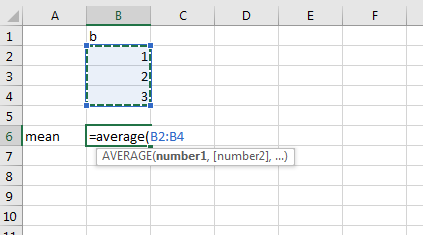


In [ ]:
# Calculating a mean in Python
b = [1,2,3]
np.mean(b)  #a function that calculates the mean

## Why Python?

### Open Source General Purpose Programming Language






#### Some Python Powered Programs:
<img src="imbedded_pics\ppp.png" alt="dr_evil" style="width:auto;height:55vh">

### With a side of Data science



#### Replacements for R and MATLAB:

<img src="imbedded_pics\PP packages.png" alt="dr_evil" style="width:auto;height:55vh">

## Python is the hero of languages:

<img src="imbedded_pics\skywalker.jpg" alt="dr_evil" style="width:auto;height:60vh">

## Python advantages:
- Designed to be easy to read and learn
- Super popular so lots of help out there
- Also always seems to have a special power to win the day!

## But what can you do with it?

- Do advanced text analysis with linguistic libraries like the Natural Language Toolkit

- Create websites with frameworks such as Django and Flask

- Train Machine Learning models with tools like, Tensorflow, fastai, and Scikit-learn

- Scrape the internet for data

- Automate the boring stuff by reorganizing files and spreadsheets

- Do most of what MATLAB and R can do, along with interacting with those programs and other

## Instead we will play the Letters game from Letters and Numbers (Or Countdown)

### The task: Make the longest word out of nine randomly picked letters

In [ ]:
play_moss()

# You already know how to Code!



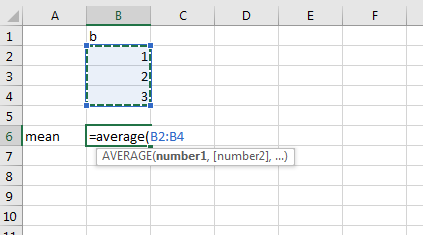


In [ ]:
# Calculating a mean in Python
b = [1,2,3]
np.mean(b)  #a function that calculates the mean




### So what are we doing  here?

## Our Python Interpreter is like a well behaved dog

![a dog](http://janfennellthedoglistener.com/static/cms/ConfusedDog.png "When you try to give you computer human words")

## Scripting is just giving this dog a list of instructions, much like a recipe


<center><img src="imbedded_pics\puppy-chefs.jpg" alt="dr_evil" style="width:auto;height:70vh"></center>


### Like all recipes we just need our python scripts to be

- In a logical order

- written in commands our dog understands

### In our Py Kitchen our Data are our ingredients

```python
Data = Bread
```

<center><img src="imbedded_pics\1200px-Anadama_bread_(1).jpg" alt="dr_evil" style="width:auto;height:70vh"></center>


### And functions are like kitchen tools

In [ ]:
from jgarber_respitch.Python_kitchen_tools_V3 import Toaster

data = 'Bread'
Toast = Toaster(data)

In [ ]:
# Calculating a mean in Python
b = [1,2,3]
np.mean(b)  #a function that calculates the mean




## but we don't want numbers, we want Letters right? 

#### Python calls any bit of text a *String*, and it knows its a string because we put "quotation" marks around it




## Kind of like Dr. Evil...
<center><img src="imbedded_pics\Dr_evil.png" alt="dr_evil" style="width:auto;height:70vh"></center>

In [ ]:
"This"


In [ ]:
'abcd""891 '


### But what if we want to use this text again?

#### if only we could *assign*  our string a nickname...... It'd be pretty Australian!!



<center><img src="imbedded_pics\Aussie_slang.png" alt="aus_slang" style="width:auto;height:70vh"></center>

In [ ]:
Garbo = 'Jonathan Lloyd Garber'

In [ ]:
Garbo

In [ ]:
L = 'abcde'
L

#### Meet our first special power
```python
all_words(Letters)
```
**Inputs:**

***Letters:*** a string of letters or a variable containing a string of letters

**Outputs:**

A print out of every word from longest to shortest beneath our cell of code

In [ ]:
all_words('abc')

In [ ]:
all_words('abcde')

### We now have the building blocks to hack Letters and Numbers

 1.) enter the letters into a python cell as a *string* and *assign* them a nickname
 
 2.) Chuck that *string* of letters into our new magic doodad - all_words() (using it's nickname maybe?)
 
 3.) Win Letters and Numbers!
 


 #### Now try it for 'ABCDEFGHI'

In [ ]:
# Enter the letters into python and assign them a nickname:



In [ ]:
# and put that variable int our magic doodad: all_word()

#### Lets play the Game show!! But first, I need team names

In [ ]:
teamnames = ["Doggies", "Tigers", "Cats", "Roos"]

In [ ]:
#run the countdown show
w, lb= countdown(teamnames)
display(w)

In [ ]:
playclick(lb)

###  So what have we learned?

 - We input text data into a python program as a  
 ```python 
"String"
```

 - We assigned strings to a variable: 
 ```python
L = 'abcde'
```

 - We input our string into a magic doodad to **WIN COUNTDOWN!!!** `all_words(L)`


### But this reminds me of a story from home about John Henry

<center><img src="imbedded_pics\John_henry1.png" alt="aus_slang" style="width:auto;height:60vh"></center>

<center><img src="imbedded_pics\Johnhenry2.png" alt="aus_slang" style="width:auto;height:60vh"></center>

<center><img src="imbedded_pics\JH3.png" alt="aus_slang" style="width:auto;height:60vh"></center>

### Python is not here to replace you

  - There is no `do_my_work_for_me()` function

 - But we can teach you to make your own special powers

### Python is here to help you

 - Automate and save time

 - Do more advanced analysis

 - Help you communicate your methods and visualize data

### Leaving you more time to

 - Write Papers

- Think of the next great research questions

 - collect more data

 - Live your **bloody life!**

### So Ready to work smarter and not harder?
<center><img src="imbedded_pics\crossarms_gif.gif" alt="aus_slang" style="width:auto;height:60vh"></center>

### Then come to Pythonista cooking class! and follow me at @GeoGarber


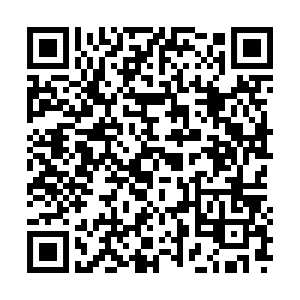
